## Linear Regression Model 

***Goal**: Build a LR model that effectively predicts  NYC rideshare prices* 

### **Datasets under consideration**

Currently, there are multiple datasets under consideration:

1. Weather (hourly)
2. MTA Ridership (daily)
3. Uber and Lyft Data 2024 (hourly)

In [435]:
# Import Libraries 
# in terminal: pip install scikit-learn numpy pandas matplotlib seaborn

import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [436]:

# import data files 
# inspect MTA_ridership, uber/lyft, and weather data sets due to available granularity 

# MTA Ridership (Daily)
mta_r = pd.read_csv('/workspaces/SU-IST707-Group_Project/Data Processing/MTA_daily_ridership_cleaned.csv')

# Weather (hourly)
weather = pd.read_csv('/workspaces/SU-IST707-Group_Project/Data Processing/weather_hourly_cleaned.csv')

# 2024 Uber/Lyft (hourly)
uber_24 = pd.read_csv('/workspaces/SU-IST707-Group_Project/Project Data (original)/uber_hourly_2024.csv')
lyft_24 = pd.read_csv('/workspaces/SU-IST707-Group_Project/Project Data (original)/lyft_hourly_2024.csv')


In [437]:
# view MTA Ridership (Daily)
mta_r

# date range: 3/1/2020 - 1/9/2025

,Date,Subways: Total Estimated Ridership,Buses: Total Estimated Ridership,LIRR: Total Estimated Ridership,Metro-North: Total Estimated Ridership,Access-A-Ride: Total Scheduled Trips,Bridges and Tunnels: Total Traffic,Staten Island Railway: Total Estimated Ridership
0,2020-03-01,2212965.0,984908.0,86790.0,55825.0,19922.0,786960.0,1636.0
1,2020-03-02,5329915.0,2209066.0,321569.0,180701.0,30338.0,874619.0,17140.0
2,2020-03-03,5481103.0,2228608.0,319727.0,190648.0,32767.0,882175.0,17453.0
3,2020-03-04,5498809.0,2177165.0,311662.0,192689.0,34297.0,905558.0,17136.0
4,2020-03-05,5496453.0,2244515.0,307597.0,194386.0,33209.0,929298.0,17203.0
...,...,...,...,...,...,...,...,...
1771,2025-01-05,1791020.0,618750.0,96683.0,79761.0,23665.0,726411.0,2039.0
1772,2025-01-06,3436491.0,1238969.0,229503.0,202575.0,35840.0,792617.0,6887.0
1773,2025-01-07,3781536.0,1275936.0,245930.0,220945.0,38048.0,842968.0,7409.0
1774,2025-01-08,3830616.0,1256260.0,239444.0,209550.0,39406.0,852748.0,7798.0


In [438]:
# view Weather
weather

# datetime range: 1/1/2020 @ 12:00 AM or 00:00:00 - 12/31/2024 @ 11:00 PM or 23:00:00

,datetime,temp,feelslike,precip,snow,windspeed,cloudcover,visibility,uvindex,conditions
0,2020-01-01 00:00:00,41,34,0.000,0.0,10,97,9,0,0
1,2020-01-01 01:00:00,39,33,0.000,0.0,9,92,9,0,0
2,2020-01-01 02:00:00,39,32,0.000,0.0,9,85,9,0,1
3,2020-01-01 03:00:00,39,30,0.000,0.0,14,54,9,0,1
4,2020-01-01 04:00:00,38,31,0.000,0.0,12,97,9,0,0
...,...,...,...,...,...,...,...,...,...,...
43843,2024-12-31 19:00:00,48,44,0.000,0.0,8,15,9,0,2
43844,2024-12-31 20:00:00,47,43,0.000,0.0,7,97,9,0,0
43845,2024-12-31 21:00:00,45,41,0.033,0.0,6,100,4,0,3
43846,2024-12-31 22:00:00,44,40,0.068,0.0,6,100,1,0,3


In [439]:
# view Uber
uber_24

# pick-up date range: 1/1/2024 - 12/31/2024
# pick-up hour: within 24hr day

,pickup_date,pickup_hour,trip_count,PULocationID_mode,DOLocationID_mode,is_weekend_mode,trip_miles_mean,trip_miles_sum,trip_time_mean,trip_time_sum,...,congestion_surcharge_mean,congestion_surcharge_sum,tips_mean,tips_sum,driver_pay_mean,driver_pay_sum,PULocationBorough,PULocationZone,DOLocationBorough,DOLocationZone
0,2024-01-01,0,35709,79,265,False,4.915987,175544.98,1110.401579,39651330,...,1.041558,37193.00,1.034306,36934.05,21.658683,773409.91,Manhattan,East Village,NaN,Outside of NYC
1,2024-01-01,1,40543,79,265,False,5.337841,216412.08,1186.874652,48119459,...,0.979374,39706.75,1.288876,52254.89,30.921294,1253642.01,Manhattan,East Village,NaN,Outside of NYC
2,2024-01-01,2,35980,37,265,False,5.566168,200270.74,1141.817538,41082595,...,0.882977,31769.50,1.156651,41616.29,28.891783,1039526.34,Brooklyn,Bushwick South,NaN,Outside of NYC
3,2024-01-01,3,29645,37,265,False,5.651971,167552.68,1071.728858,31771402,...,0.811106,24045.25,0.848584,25156.28,22.260350,659908.07,Brooklyn,Bushwick South,NaN,Outside of NYC
4,2024-01-01,4,19839,37,265,False,5.790343,114874.61,1043.929634,20710520,...,0.705416,13994.75,0.814871,16166.23,20.588491,408455.08,Brooklyn,Bushwick South,NaN,Outside of NYC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31,19,35919,61,265,False,4.352662,156343.26,1029.288315,36971007,...,0.958761,34437.75,0.980732,35226.93,18.156555,652165.29,Brooklyn,Crown Heights North,NaN,Outside of NYC
8780,2024-12-31,20,44143,79,265,False,4.003739,176737.03,1023.653286,45187127,...,1.034434,45663.00,0.930973,41095.92,18.154112,801376.98,Manhattan,East Village,NaN,Outside of NYC
8781,2024-12-31,21,46967,79,265,False,3.986125,187216.35,1057.676326,49675884,...,1.018806,47850.25,0.997970,46871.64,20.714563,972900.90,Manhattan,East Village,NaN,Outside of NYC
8782,2024-12-31,22,46018,79,37,False,4.084107,187942.44,1041.351319,47920905,...,0.940817,43294.50,0.961136,44229.57,22.529015,1036740.22,Manhattan,East Village,Brooklyn,Bushwick South


In [440]:
# view Lyft
lyft_24

# pick-up date range: 1/1/2024 - 12/31/2024
# pick-up hour: within 24hr day

,pickup_date,pickup_hour,trip_count,PULocationID_mode,DOLocationID_mode,is_weekend_mode,trip_miles_mean,trip_miles_sum,trip_time_mean,trip_time_sum,...,congestion_surcharge_mean,congestion_surcharge_sum,tips_mean,tips_sum,driver_pay_mean,driver_pay_sum,PULocationBorough,PULocationZone,DOLocationBorough,DOLocationZone
0,2024-01-01,0,12828,79,265,False,4.793260,61487.937,1067.112176,13688915,...,0.972618,12476.75,1.390023,17831.21,18.531449,237721.43,Manhattan,East Village,NaN,Outside of NYC
1,2024-01-01,1,11841,37,265,False,4.630181,54825.976,1091.439912,12923740,...,0.925724,10961.50,1.730652,20492.65,24.047874,284750.88,Brooklyn,Bushwick South,NaN,Outside of NYC
2,2024-01-01,2,13384,37,265,False,5.278340,70645.298,1116.715033,14946114,...,1.013169,13560.25,1.503468,20122.42,27.234666,364508.77,Brooklyn,Bushwick South,NaN,Outside of NYC
3,2024-01-01,3,14046,37,265,False,5.695396,79997.539,1108.180478,15565503,...,1.032180,14498.00,0.811929,11404.36,23.592562,331381.13,Brooklyn,Bushwick South,NaN,Outside of NYC
4,2024-01-01,4,11238,80,265,False,6.150049,69114.248,1118.921160,12574436,...,0.930615,10458.25,0.532919,5988.94,21.519011,241830.65,Brooklyn,East Williamsburg,NaN,Outside of NYC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8778,2024-12-31,19,11725,79,265,False,4.048416,47467.677,1031.236930,12091253,...,1.025650,12025.75,1.377255,16148.31,16.941392,198637.82,Manhattan,East Village,NaN,Outside of NYC
8779,2024-12-31,20,13053,79,79,False,3.626716,47339.520,1018.087643,13289098,...,1.154945,15075.50,1.449972,18926.49,17.462979,227944.26,Manhattan,East Village,Manhattan,East Village
8780,2024-12-31,21,13313,79,79,False,3.713633,49439.602,1070.680913,14253975,...,1.197664,15944.50,1.740596,23172.56,21.003311,279617.08,Manhattan,East Village,Manhattan,East Village
8781,2024-12-31,22,13179,79,37,False,3.672513,48400.046,1046.499431,13791816,...,1.196696,15771.25,1.572809,20728.05,21.999917,289936.91,Manhattan,East Village,Brooklyn,Bushwick South


### Observations / Initial Thoughts

#### Data Review
- (3) datasets have hourly tempos (Uber/Lyft/Weather), (1) dataset has a daily tempos (MTA Ridership)
- uber and lyft data have the same range of dates (1/1/2024 - 12/31/2024); however have a seperate column that indicates pickup time. This may need to be combined for consistency 
- weather data has a date/time range from 1/1/2020 to 12/31/2024; has an encoded conditions column to make sure all values are numbers.
- mta ridership data range is from 3/1/2020 to 1/9/2025, is daily only and includes daily totals for Subways,Buses,Long Island Rail Road (LIRR), Metro-North, Access-A-Ride,Bridges and Tunnels,Staten Island Railway
- will need to aggregate and align the data in order to train the model properly

#### Model Consideration - Linear Regression

A linear regression model is well-suited for this scenario as it quantifies the relationship between hourly rideshare prices and influencing factors such as weather conditions, time-based variables, and MTA ridership levels. By estimating the contribution of each feature to price fluctuations, the model enables both predictive accuracy and interpretable insights for operational and policy decision-making.




### **Additional Data Processing**

In [441]:
# 2024 Uber/Lyft dataset merge 

# note: need to identify which row belongs to which service 'uber' or 'lyft';
#       and combine the pickup_date and pickup_hour columns

uber_24['service'] = 'uber'
lyft_24['service'] = 'lyft'

uber_24['datetime'] = pd.to_datetime(uber_24['pickup_date']) + pd.to_timedelta(uber_24['pickup_hour'], unit='h')
lyft_24['datetime'] = pd.to_datetime(lyft_24['pickup_date']) + pd.to_timedelta(lyft_24['pickup_hour'], unit='h')

rideshare = pd.concat([uber_24, lyft_24], ignore_index=True)

missing_price_count = rideshare['driver_pay_mean'].isna().sum()
print(f"Missing 'driver_pay_mean' rows: {missing_price_count}")

rideshare = rideshare.dropna(subset=['driver_pay_mean'])

print(f"Remaining rows after drop: {len(rideshare)}")

missing_by_column = rideshare.isna().sum()
print("\nMissing values by column:\n", missing_by_column[missing_by_column > 0])

Missing 'driver_pay_mean' rows: 0
Remaining rows after drop: 17567

Missing values by column:
 DOLocationBorough    11857
dtype: int64


In [442]:
# need a total_rideshare_cost_mean column
fare_components = [
    'base_passenger_fare_mean',
    'tolls_mean',
    'bcf_mean',
    'sales_tax_mean',
    'congestion_surcharge_mean',
    'tips_mean',
    'driver_pay_mean'
]

for col in fare_components:
    rideshare[col] = pd.to_numeric(rideshare[col], errors='coerce')

# Calculate total cost for the mean fares and all charges
rideshare['total_rideshare_cost_mean'] = rideshare[fare_components].sum(axis=1)

rideshare = rideshare[
    [
        'datetime',
        'service',
        'total_rideshare_cost_mean',
        'trip_count',
        'trip_miles_mean',
        'trip_time_mean',
        'tips_mean',
        'congestion_surcharge_mean',
        'is_weekend_mode'
    ]
]

rideshare

,datetime,service,total_rideshare_cost_mean,trip_count,trip_miles_mean,trip_time_mean,tips_mean,congestion_surcharge_mean,is_weekend_mode
0,2024-01-01 00:00:00,uber,56.692673,35709,4.915987,1110.401579,1.034306,1.041558,False
1,2024-01-01 01:00:00,uber,80.004944,40543,5.337841,1186.874652,1.288876,0.979374,False
2,2024-01-01 02:00:00,uber,75.703374,35980,5.566168,1141.817538,1.156651,0.882977,False
3,2024-01-01 03:00:00,uber,60.823662,29645,5.651971,1071.728858,0.848584,0.811106,False
4,2024-01-01 04:00:00,uber,56.104189,19839,5.790343,1043.929634,0.814871,0.705416,False
...,...,...,...,...,...,...,...,...,...
17562,2024-12-31 19:00:00,lyft,45.672474,11725,4.048416,1031.236930,1.377255,1.025650,False
17563,2024-12-31 20:00:00,lyft,47.069340,13053,3.626716,1018.087643,1.449972,1.154945,False
17564,2024-12-31 21:00:00,lyft,56.970729,13313,3.713633,1070.680913,1.740596,1.197664,False
17565,2024-12-31 22:00:00,lyft,58.098577,13179,3.672513,1046.499431,1.572809,1.196696,False


In [443]:
# export new rideshare cleaned data

# total_rideshare_cost_mean is a sum of the following:
# base_passenger_fare_mean
# tolls_mean
# bcf_mean
# sales_tax_mean
# congestion_surcharge_mean
# tips_mean
# driver_pay_mean

rideshare.to_csv("rideshare_cleaned_LR.csv", index=False)


In [444]:
# weather filter and merge with rideshare data 

weather['datetime'] = pd.to_datetime(weather['datetime'])
weather_24 = weather[
    (weather['datetime'] >= "2024-01-01") & 
    (weather['datetime'] < "2025-01-01")
].copy()

# merge on datetime due to previous processing of the rideshare data
rideshare_weather = pd.merge(rideshare, weather_24, on='datetime', how='left')
rideshare_weather

,datetime,service,total_rideshare_cost_mean,trip_count,trip_miles_mean,trip_time_mean,tips_mean,congestion_surcharge_mean,is_weekend_mode,temp,feelslike,precip,snow,windspeed,cloudcover,visibility,uvindex,conditions
0,2024-01-01 00:00:00,uber,56.692673,35709,4.915987,1110.401579,1.034306,1.041558,False,43,39,0.000,0.0,6,97,9,0,0
1,2024-01-01 01:00:00,uber,80.004944,40543,5.337841,1186.874652,1.288876,0.979374,False,42,38,0.000,0.0,6,100,9,0,0
2,2024-01-01 02:00:00,uber,75.703374,35980,5.566168,1141.817538,1.156651,0.882977,False,42,38,0.000,0.0,5,100,9,0,0
3,2024-01-01 03:00:00,uber,60.823662,29645,5.651971,1071.728858,0.848584,0.811106,False,41,41,0.000,0.0,1,100,9,0,0
4,2024-01-01 04:00:00,uber,56.104189,19839,5.790343,1043.929634,0.814871,0.705416,False,41,38,0.000,0.0,4,100,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17562,2024-12-31 19:00:00,lyft,45.672474,11725,4.048416,1031.236930,1.377255,1.025650,False,48,44,0.000,0.0,8,15,9,0,2
17563,2024-12-31 20:00:00,lyft,47.069340,13053,3.626716,1018.087643,1.449972,1.154945,False,47,43,0.000,0.0,7,97,9,0,0
17564,2024-12-31 21:00:00,lyft,56.970729,13313,3.713633,1070.680913,1.740596,1.197664,False,45,41,0.033,0.0,6,100,4,0,3
17565,2024-12-31 22:00:00,lyft,58.098577,13179,3.672513,1046.499431,1.572809,1.196696,False,44,40,0.068,0.0,6,100,1,0,3


In [445]:
# output weather and rideshare merged data 

rideshare_weather.to_csv("R_W_cleaned_LR.csv", index=False)

In [446]:
# Since the MTA Ridership has daily totals; 
# assign daily totals to each hour of that 
# day (trial if hourly is available for 
# future model versions ~111 million rows)

mta_r['Date'] = pd.to_datetime(mta_r['Date'])

rideshare_weather['date'] = rideshare_weather['datetime'].dt.normalize()  # keeps as datetime (midnight)
# Alternatively: .dt.date (if mta_r['Date'] is date-only)

merged_df = pd.merge(
    rideshare_weather,
    mta_r,
    left_on='date',
    right_on='Date',
    how='left'
)

# 4. Drop extra date columns if you don’t need them
merged_df.drop(columns=['Date', 'date'], inplace=True)
merged_df



,datetime,service,total_rideshare_cost_mean,trip_count,trip_miles_mean,trip_time_mean,tips_mean,congestion_surcharge_mean,is_weekend_mode,temp,...,visibility,uvindex,conditions,Subways: Total Estimated Ridership,Buses: Total Estimated Ridership,LIRR: Total Estimated Ridership,Metro-North: Total Estimated Ridership,Access-A-Ride: Total Scheduled Trips,Bridges and Tunnels: Total Traffic,Staten Island Railway: Total Estimated Ridership
0,2024-01-01 00:00:00,uber,56.692673,35709,4.915987,1110.401579,1.034306,1.041558,False,43,...,9,0,0,1648734.0,455965.0,82811.0,73957.0,9165.0,730489.0,2018.0
1,2024-01-01 01:00:00,uber,80.004944,40543,5.337841,1186.874652,1.288876,0.979374,False,42,...,9,0,0,1648734.0,455965.0,82811.0,73957.0,9165.0,730489.0,2018.0
2,2024-01-01 02:00:00,uber,75.703374,35980,5.566168,1141.817538,1.156651,0.882977,False,42,...,9,0,0,1648734.0,455965.0,82811.0,73957.0,9165.0,730489.0,2018.0
3,2024-01-01 03:00:00,uber,60.823662,29645,5.651971,1071.728858,0.848584,0.811106,False,41,...,9,0,0,1648734.0,455965.0,82811.0,73957.0,9165.0,730489.0,2018.0
4,2024-01-01 04:00:00,uber,56.104189,19839,5.790343,1043.929634,0.814871,0.705416,False,41,...,9,0,0,1648734.0,455965.0,82811.0,73957.0,9165.0,730489.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17562,2024-12-31 19:00:00,lyft,45.672474,11725,4.048416,1031.236930,1.377255,1.025650,False,48,...,9,0,2,2874096.0,984193.0,223942.0,186037.0,31482.0,818825.0,4925.0
17563,2024-12-31 20:00:00,lyft,47.069340,13053,3.626716,1018.087643,1.449972,1.154945,False,47,...,9,0,0,2874096.0,984193.0,223942.0,186037.0,31482.0,818825.0,4925.0
17564,2024-12-31 21:00:00,lyft,56.970729,13313,3.713633,1070.680913,1.740596,1.197664,False,45,...,4,0,3,2874096.0,984193.0,223942.0,186037.0,31482.0,818825.0,4925.0
17565,2024-12-31 22:00:00,lyft,58.098577,13179,3.672513,1046.499431,1.572809,1.196696,False,44,...,1,0,3,2874096.0,984193.0,223942.0,186037.0,31482.0,818825.0,4925.0


In [447]:
# rename columns for easier understanding

merged_df.rename(columns={
    'Subways: Total Estimated Ridership': 'Subways: Total Estimated Ridership (Daily)',
    'Buses: Total Estimated Ridership': 'Buses: Total Estimated Ridership (Daily)',
    'LIRR: Total Estimated Ridership': 'LIRR: Total Estimated Ridership (Daily)',
    'Metro-North: Total Estimated Ridership': 'Metro-North: Total Estimated Ridership (Daily)',
    'Access-A-Ride: Total Scheduled Trips': 'Access-A-Ride: Total Scheduled Trips (Daily)',
    'Bridges and Tunnels: Total Traffic': 'Bridges and Tunnels: Total Traffic (Daily)',
    'Staten Island Railway: Total Estimated Ridership': 'Staten Island Railway: Total Estimated Ridership (Daily)'
}, inplace=True)

merged_df

,datetime,service,total_rideshare_cost_mean,trip_count,trip_miles_mean,trip_time_mean,tips_mean,congestion_surcharge_mean,is_weekend_mode,temp,...,visibility,uvindex,conditions,Subways: Total Estimated Ridership (Daily),Buses: Total Estimated Ridership (Daily),LIRR: Total Estimated Ridership (Daily),Metro-North: Total Estimated Ridership (Daily),Access-A-Ride: Total Scheduled Trips (Daily),Bridges and Tunnels: Total Traffic (Daily),Staten Island Railway: Total Estimated Ridership (Daily)
0,2024-01-01 00:00:00,uber,56.692673,35709,4.915987,1110.401579,1.034306,1.041558,False,43,...,9,0,0,1648734.0,455965.0,82811.0,73957.0,9165.0,730489.0,2018.0
1,2024-01-01 01:00:00,uber,80.004944,40543,5.337841,1186.874652,1.288876,0.979374,False,42,...,9,0,0,1648734.0,455965.0,82811.0,73957.0,9165.0,730489.0,2018.0
2,2024-01-01 02:00:00,uber,75.703374,35980,5.566168,1141.817538,1.156651,0.882977,False,42,...,9,0,0,1648734.0,455965.0,82811.0,73957.0,9165.0,730489.0,2018.0
3,2024-01-01 03:00:00,uber,60.823662,29645,5.651971,1071.728858,0.848584,0.811106,False,41,...,9,0,0,1648734.0,455965.0,82811.0,73957.0,9165.0,730489.0,2018.0
4,2024-01-01 04:00:00,uber,56.104189,19839,5.790343,1043.929634,0.814871,0.705416,False,41,...,9,0,0,1648734.0,455965.0,82811.0,73957.0,9165.0,730489.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17562,2024-12-31 19:00:00,lyft,45.672474,11725,4.048416,1031.236930,1.377255,1.025650,False,48,...,9,0,2,2874096.0,984193.0,223942.0,186037.0,31482.0,818825.0,4925.0
17563,2024-12-31 20:00:00,lyft,47.069340,13053,3.626716,1018.087643,1.449972,1.154945,False,47,...,9,0,0,2874096.0,984193.0,223942.0,186037.0,31482.0,818825.0,4925.0
17564,2024-12-31 21:00:00,lyft,56.970729,13313,3.713633,1070.680913,1.740596,1.197664,False,45,...,4,0,3,2874096.0,984193.0,223942.0,186037.0,31482.0,818825.0,4925.0
17565,2024-12-31 22:00:00,lyft,58.098577,13179,3.672513,1046.499431,1.572809,1.196696,False,44,...,1,0,3,2874096.0,984193.0,223942.0,186037.0,31482.0,818825.0,4925.0


In [448]:
# output merged data 

merged_df.to_csv("merged_cleaned_LR.csv", index=False)

###  **Model Training**

#### Trial 1

This is the better model!

- **MAE: 1.55**; On average, predicted rideshare prices are within $1.55 of the actual values, showing strong accuracy

- **MSE: 3.97**; model makes small errors overall which results in majority of big errors being avoided. 

- **RMSE: 1.99**; handles larger errors and outliers well, with most predictions deviating less than $2 from actual values

- **R² Score: 0.8469**; explains about 85% of the variability in rideshare prices, showing that the selected features capture key drivers of pricing behavior.

In [449]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# linear regression features to capture (time-based)
merged_df['hour_1'] = merged_df['datetime'].dt.hour  # focused on daily/hr trends; want to see times most impacted by price hikes
merged_df['weekday_1'] = merged_df['datetime'].dt.weekday  # focused on weekly trends; commutes vary between the weekday and weekend
merged_df['month_1'] = merged_df['datetime'].dt.month  # focused on seasonality; cooling (summer/spring) vs heating (fall/winter) seasons, holidays, etc.

# X and Y features; one-hot encode the 'service' column
X_1 = merged_df.drop(columns=['datetime', 'total_rideshare_cost_mean'])
X_1 = pd.get_dummies(X_1, columns=['service'], drop_first=True) 

y_1 = merged_df['total_rideshare_cost_mean']  # this is the goal of the project!

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    X_1, y_1, test_size=0.2, shuffle=False  # maintain time order
)

model_1 = LinearRegression()
model_1.fit(X_train_1, y_train_1)  # train

y_pred_1 = model_1.predict(X_test_1)

# Evaluate Trained Model
mae_1 = mean_absolute_error(y_test_1, y_pred_1)
mse_1 = mean_squared_error(y_test_1, y_pred_1)
rmse_1 = np.sqrt(mse_1)
r2_1 = r2_score(y_test_1, y_pred_1)

print(f"MAE: {mae_1:.2f}")  # evaluates the accuracy of predictions by calculating the average of the absolute
                            # differences between predicted and actual values

print(f"MSE: {mse_1:.2f}")  # mean squared error; lower indicates a better fit model; 
                            # calculates the average squared difference between actual 
                            # and predicted values for the total number of observations n

print(f"RMSE: {rmse_1:.2f}")  # root mean squared error; how far a model’s predictions deviate from the actual values

print(f"R² Score: {r2_1:.4f}")  # coefficient of determination; this needs to be as close to "1" as possible; 
                                # measures how well a regression model explains the variability of the target variable

# Feature Coefficients 
coeffs_1 = pd.DataFrame({
    'Feature': X_1.columns,
    'Coefficient': model_1.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coeffs_1)


MAE: 1.55
MSE: 3.97
RMSE: 1.99
R² Score: 0.8469
                                              Feature  Coefficient
3                                           tips_mean     7.267070
8                                              precip     6.510730
1                                     trip_miles_mean     4.067491
9                                                snow    -3.669844
4                           congestion_surcharge_mean     2.827469
25                                       service_uber     1.077598
5                                     is_weekend_mode     0.963515
24                                            month_1     0.238482
23                                          weekday_1    -0.180986
13                                            uvindex    -0.167921
14                                         conditions     0.105012
22                                             hour_1    -0.061038
7                                           feelslike    -0.021967
2             

#### Trial 2

- note: selecting specified features did not produce better evaluation scores than trial 1

In [450]:
# improve feature selection
from sklearn.preprocessing import StandardScaler

# linear regression features to capture (time-based)
merged_df['hour'] = merged_df['datetime'].dt.hour  # focused on daily/hr trends; want to see times most impacted by price hikes
merged_df['weekday'] = merged_df['datetime'].dt.weekday  # focused on weekly trends; commutes vary between the weekday and weekend
merged_df['month'] = merged_df['datetime'].dt.month  # focused on seasonality; cooling (summer/spring) vs heating (fall/winter) seasons, holidays, etc.

selected_features = [
    'tips_mean',
    'trip_miles_mean',
    'congestion_surcharge_mean',
    'precip',
    'snow',
    'is_weekend_mode',
    'service_uber',
    'month',
    'hour'
]

# X and Y features; one-hot encode the 'service' column
X = merged_df.drop(columns=['datetime', 'total_rideshare_cost_mean'])
X = pd.get_dummies(X, columns=['service'], drop_first=True)

X = X[selected_features]  # keep only selected features

y = merged_df['total_rideshare_cost_mean']  # this is the goal of the project!

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, shuffle=False
)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate Trained Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")  # evaluates the accuracy of predictions by calculating the average of the absolute
                          # differences between predicted and actual values

print(f"MSE: {mse:.2f}")  # mean squared error; lower indicates a better fit model; 
                          # calculates the average squared difference between actual 
                          # and predicted values for the total number of observations n

print(f"RMSE: {rmse:.2f}")  # root mean squared error; how far a model’s predictions deviate from the actual values

print(f"R² Score: {r2:.4f}")  # coefficient of determination; this needs to be as close to "1" as possible; 
                              # measures how well a regression model explains the variability of the target variable

# Feature Coefficients 
coeffs = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coeffs)


MAE: 2.56
MSE: 10.52
RMSE: 3.24
R² Score: 0.5945
                     Feature  Coefficient
0                  tips_mean     4.308460
1            trip_miles_mean     2.202383
6               service_uber     1.506611
7                      month     1.044637
5            is_weekend_mode     0.198579
4                       snow    -0.111149
2  congestion_surcharge_mean    -0.110971
3                     precip     0.072585
8                       hour     0.066278


#### Trained Model Visual - Trial 1

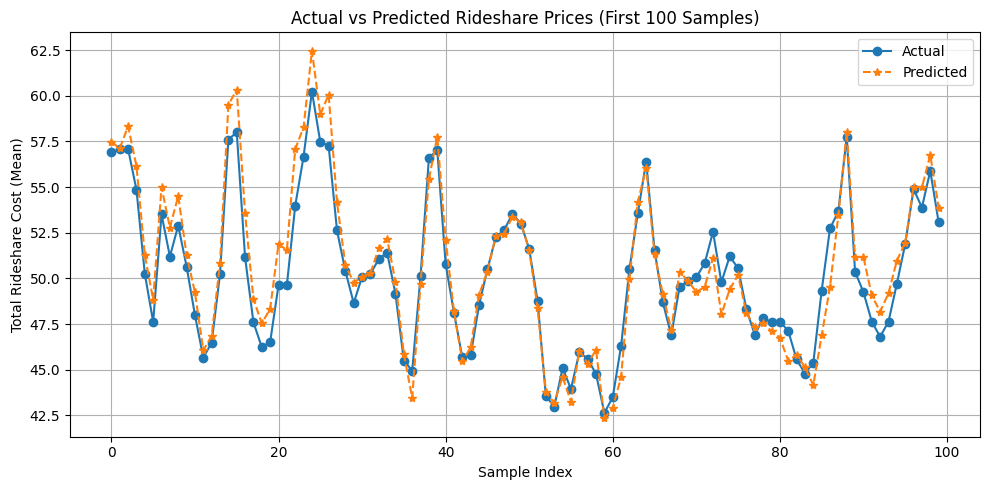

In [459]:
# Actual Cost vs. Predicted Cost
# (n=100) provided the best clarity

plt.figure(figsize=(10, 5))
plt.plot(y_test_1.values[:100], label='Actual', marker='o')
plt.plot(y_pred_1[:100], label='Predicted', linestyle='--', marker='*')
plt.title("Actual vs Predicted Rideshare Prices (First 100 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Total Rideshare Cost (Mean)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### Note about Original Trials

- Original Trial 1 and 2 had lesser features and were not producing an ideal R2 value (between -0.06 and 0.02)
- needed to change the input data so some features previously removed were re-added to merged_df
    + including: trip_count, trip_miles_mean, trip_time_mean, tips_mean, congestion_surcharge_mean, and is_weekend_mode
- once changes were made, the model trials performed better

####  Feature Feedback

- The most impactful features in the model include tips_mean, precip, trip_miles_mean, snow, congestion_surcharge_mean, service_uber, and is_weekend_mode, as they strongly correlate with variations in rideshare prices. 

- These features reflect factors like trip length, weather-related demand shifts, service-level differences, and weekend behavior — all of which significantly influence fare costs. 

- Time-based features like month, weekday, and hour offer moderate predictive value and are worth keeping for seasonal or hourly trend patterns. 

- Environmental indicators such as uvindex, conditions, and feelslike have low individual impact but might be useful in interaction with other features. 

- Features like trip_count, windspeed, cloudcover, visibility, and daily MTA ridership metrics contribute very little and could be removed to streamline the model.

### **Predictions on Test Data**

In [465]:
# apply selected model to test data 

y_pred_1 = model_1.predict(X_test_1)

y_pred_series = pd.Series(y_pred_1, index=y_test_1.index, name='Predicted')

test_results_df = pd.concat([
    X_test_1,                               # test features
    y_test_1.rename('Actual Fare Mean'),    # actual values
    y_pred_series                           # predicted values
], axis=1)

test_results_df

,trip_count,trip_miles_mean,trip_time_mean,tips_mean,congestion_surcharge_mean,is_weekend_mode,temp,feelslike,precip,snow,...,Metro-North: Total Estimated Ridership (Daily),Access-A-Ride: Total Scheduled Trips (Daily),Bridges and Tunnels: Total Traffic (Daily),Staten Island Railway: Total Estimated Ridership (Daily),hour_1,weekday_1,month_1,service_uber,Actual Fare Mean,Predicted
14053,6914,4.791800,1418.262511,1.385963,1.038509,False,65,65,0.022,0.0,...,202867.0,36667.0,920296.0,6593.0,14,2,8,False,56.894805,57.487273
14054,7066,4.608294,1456.249788,1.330791,1.030180,False,65,65,0.028,0.0,...,202867.0,36667.0,920296.0,6593.0,15,2,8,False,57.062968,57.115350
14055,6762,4.653323,1470.612245,1.472700,1.013458,False,65,65,0.002,0.0,...,202867.0,36667.0,920296.0,6593.0,16,2,8,False,57.086729,58.331172
14056,8210,4.517106,1394.250426,1.499967,1.081912,False,66,66,0.000,0.0,...,202867.0,36667.0,920296.0,6593.0,17,2,8,False,54.853894,56.144053
14057,7984,4.386673,1219.232966,1.358656,1.225169,False,66,66,0.000,0.0,...,202867.0,36667.0,920296.0,6593.0,18,2,8,False,50.254162,51.280342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17562,11725,4.048416,1031.236930,1.377255,1.025650,False,48,44,0.000,0.0,...,186037.0,31482.0,818825.0,4925.0,19,1,12,False,45.672474,46.783312
17563,13053,3.626716,1018.087643,1.449972,1.154945,False,47,43,0.000,0.0,...,186037.0,31482.0,818825.0,4925.0,20,1,12,False,47.069340,45.599946
17564,13313,3.713633,1070.680913,1.740596,1.197664,False,45,41,0.033,0.0,...,186037.0,31482.0,818825.0,4925.0,21,1,12,False,56.970729,49.933000
17565,13179,3.672513,1046.499431,1.572809,1.196696,False,44,40,0.068,0.0,...,186037.0,31482.0,818825.0,4925.0,22,1,12,False,58.098577,48.235548
